In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 12.,8.

import seaborn as sns
import pandas as pd
import wandb

pd.set_option('display.max_columns', None)



In [2]:
api = wandb.Api()
entity, project = "invariance-learners", "neurips2023experiments"  # set to your entity and project 
runs = api.runs(entity + "/" + project)

In [3]:
summary_list, config_list, name_list, tags, ids, states = [], [], [], [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
         if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

    tags.append(run.tags)

    ids.append(run.id)

    states.append(run.state)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list,
    "tags": tags,
    "id": ids,
    "state": states
    })

runs_df

,summary,config,name,tags,id,state
0,"{'_wandb': {'runtime': 643}, 'val/z_kld': 77.4...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 8, 'model': ...",major-glitter-1920,"[angle_sweep, num_trn_sweep]",3v28f8wv,finished
1,"{'_step': 15000, 'val/ll': 1080.7193603515625,...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 7, 'model': ...",cool-surf-1917,"[angle_sweep, num_trn_sweep]",v7m0w1bf,finished
2,"{'γ': 1, 'σ': 0.1213771253824234, 'val/z_kld':...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 3, 'model': ...",avid-leaf-1918,"[angle_sweep, num_trn_sweep]",1jk1l0bv,finished
3,"{'best_val_loss': -1009.8848266601562, 'best_v...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 4, 'model': ...",floral-galaxy-1918,"[angle_sweep, num_trn_sweep]",1dbjhe5j,finished
4,"{'α': 1, '_timestamp': 1683514020, 'train/loss...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 9, 'model': ...",wise-wave-1916,"[angle_sweep, num_trn_sweep]",2lnf9wui,finished
...,...,...,...,...,...,...
1915,"{'γ': 1, 'σ': 0.13533242046833038, 'val/z_kld'...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 1, 'model': ...",legendary-hill-4,"[angle_sweep, hidden, num_trn_sweep]",1o0kl4md,finished
1916,"{'train/loss': -791.203369140625, 'train/z_kld...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 2, 'model': ...",wandering-fog-20,"[angle_sweep, hidden, num_trn_sweep]",1b9bni7k,finished
1917,"{'σ': 0.17989033460617063, 'val/ll': 811.66210...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 0, 'model': ...",iconic-field-8,"[angle_sweep, hidden, num_trn_sweep]",1awux98q,finished
1918,"{'_wandb': {'runtime': 336}, 'train/loss': -61...","{'α': 1, 'β': 10, 'γ': 1, 'seed': 1, 'model': ...",kind-shape-6,"[angle_sweep, hidden, num_trn_sweep]",1adk4z59,finished


In [4]:
df_expanded = runs_df.join(pd.json_normalize(runs_df['summary'], record_prefix='summary.').add_prefix('summary.')).drop('summary', axis='columns')
df_expanded = df_expanded.join(pd.json_normalize(runs_df['config'], record_prefix='config').add_prefix('config.')).drop('config', axis='columns')

df_expanded.columns

Index(['name', 'tags', 'id', 'state', 'summary.val/z_kld',
       'summary.best_val_step', 'summary.α', 'summary.β', 'summary.train/loss',
       'summary.best_val_ll', 'summary._step', 'summary.val/loss',
       'summary.train/z_kld', 'summary.best_val_loss',
       'summary.best_val_z_kld', 'summary.train/ll', 'summary._timestamp',
       'summary.val/ll', 'summary._runtime', 'summary.val/elbo',
       'summary.train/elbo', 'summary.learing_rate', 'summary.best_val_elbo',
       'summary.γ', 'summary.σ', 'summary._wandb.runtime',
       'summary.prior_samples.sha256', 'summary.prior_samples.path',
       'summary.prior_samples.size', 'summary.prior_samples._type',
       'summary.prior_samples.width', 'summary.prior_samples.format',
       'summary.prior_samples.height', 'summary.best_prior_samples.width',
       'summary.best_prior_samples.format',
       'summary.best_prior_samples.height',
       'summary.best_prior_samples.sha256', 'summary.best_prior_samples.path',
       'summa

In [5]:
df_expanded

,name,tags,id,state,summary.val/z_kld,summary.best_val_step,summary.α,summary.β,summary.train/loss,summary.best_val_ll,summary._step,summary.val/loss,summary.train/z_kld,summary.best_val_loss,summary.best_val_z_kld,summary.train/ll,summary._timestamp,summary.val/ll,summary._runtime,summary.val/elbo,summary.train/elbo,summary.learing_rate,summary.best_val_elbo,summary.γ,summary.σ,summary._wandb.runtime,summary.prior_samples.sha256,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val_reconstructions.size,summary.val_reconstructions._type,config.α,config.β,config.γ,config.seed,config.dataset,config.pp_eval,config.pp_train,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.shuffle_buffer_size,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps
0,major-glitter-1920,"[angle_sweep, num_trn_sweep]",3v28f8wv,finished,77.459290,15000,1,1.0,-964.675171,1079.595703,15000,-1002.136475,76.937447,-1002.136475,77.459290,1041.612671,1683514025,1079.595703,641,1002.136475,964.675171,0.0001,1002.136475,1,0.124643,643,44c69652b600c3c7920ab30772f575cd913d722637eae4...,media/images/prior_samples_15000_44c69652b600c...,108652,image-file,16000,png,800,16000,png,800,44c69652b600c3c7920ab30772f575cd913d722637eae4...,media/images/best_prior_samples_summary_44c696...,108652,image-file,16000,png,1600,761d0ef414799f7359f68872929723530a4a4e6ee47c44...,media/images/val_reconstructions_15000_761d0ef...,186536,image-file,1,10,1,8,MNIST,"value_range(-1, 1)|random_rotate(-180, 180, fi...","value_range(-1, 1)|random_rotate(-180, 180, fi...",train[:10000],512,500,VAE,adamw,15001,train[10000:60000],0.0001,warmup_cosine_decay_schedule,cosine_decay_schedule,True,50000,"[256, 128, 64]",[256],"[64, 128, 256]",[256],128,0.0001,0.0001,0.001,7501,750,0.1,7501
1,cool-surf-1917,"[angle_sweep, num_trn_sweep]",v7m0w1bf,finished,76.375893,15000,1,1.0,-949.782349,1080.719360,15000,-1004.343445,75.696388,-1004.343445,76.375893,1025.478760,1683514026,1080.719360,643,1004.343445,949.782349,0.0001,1004.343445,1,0.125107,646,3d5155ec478715234c6d667d8955f1b0f33895ba392f3a...,media/images/prior_samples_15000_3d5155ec47871...,108811,image-file,16000,png,800,16000,png,800,3d5155ec478715234c6d667d8955f1b0f33895ba392f3a...,media/images/best_prior_samples_summary_3d5155...,108811,image-file,16000,png,1600,d023bf19f81aa51da3aa9fd6c6da58cd5127f23e3a74c8...,media/images/val_reconstructions_15000_d023bf1...,186481,image-file,1,10,1,7,MNIST,"value_range(-1, 1)|random_rotate(-180, 180, fi...","value_range(-1, 1)|random_rotate(-180, 180, fi...",train[:10000],512,500,VAE,adamw,15001,train[10000:60000],0.0001,warmup_cosine_decay_schedule,cosine_decay_schedule,True,50000,"[256, 128, 64]",[256],"[64, 128, 256]",[256],128,0.0001,0.0001,0.001,7501,750,0.1,7501
2,avid-leaf-1918,"[angle_sweep, num_trn_sweep]",1jk1l0bv,finished,81.441498,14500,1,1.0,-992.089294,1069.975098,15000,-986.235840,79.238785,-990.910522,79.064651,1071.328125,1683514025,1067.677490,642,986.235840,992.089294,0.0001,990.910522,1,0.12137

In [6]:
# take only completed runs
df_filtered = df_expanded[df_expanded['state'] == 'finished']

# take only runs with certain tags
tags_to_keep = ['angle_sweep', 'num_trn_sweep']
df_filtered = df_filtered[df_filtered['tags'].apply(lambda x: all(tag in x for tag in tags_to_keep))]

# take only runs without certain tags
tags_to_remove = ['hidden']
df_filtered = df_filtered[~df_filtered['tags'].apply(lambda x: any(tag in x for tag in tags_to_remove))]

df_filtered

,name,tags,id,state,summary.val/z_kld,summary.best_val_step,summary.α,summary.β,summary.train/loss,summary.best_val_ll,summary._step,summary.val/loss,summary.train/z_kld,summary.best_val_loss,summary.best_val_z_kld,summary.train/ll,summary._timestamp,summary.val/ll,summary._runtime,summary.val/elbo,summary.train/elbo,summary.learing_rate,summary.best_val_elbo,summary.γ,summary.σ,summary._wandb.runtime,summary.prior_samples.sha256,summary.prior_samples.path,summary.prior_samples.size,summary.prior_samples._type,summary.prior_samples.width,summary.prior_samples.format,summary.prior_samples.height,summary.best_prior_samples.width,summary.best_prior_samples.format,summary.best_prior_samples.height,summary.best_prior_samples.sha256,summary.best_prior_samples.path,summary.best_prior_samples.size,summary.best_prior_samples._type,summary.val_reconstructions.width,summary.val_reconstructions.format,summary.val_reconstructions.height,summary.val_reconstructions.sha256,summary.val_reconstructions.path,summary.val_reconstructions.size,summary.val_reconstructions._type,config.α,config.β,config.γ,config.seed,config.dataset,config.pp_eval,config.pp_train,config.val_split,config.batch_size,config.eval_every,config.model_name,config.optim_name,config.total_steps,config.train_split,config.learning_rate,config.lr_schedule_name,config.β_schedule_name,config.repeat_after_batch,config.shuffle_buffer_size,config.model.X_given_Z.conv_dims,config.model.X_given_Z.dense_dims,config.model.Z_given_X.conv_dims,config.model.Z_given_X.dense_dims,config.model.latent_dim,config.optim.weight_decay,config.lr_schedule.end_value,config.lr_schedule.peak_value,config.lr_schedule.decay_steps,config.lr_schedule.warmup_steps,config.β_schedule.alpha,config.β_schedule.decay_steps
0,major-glitter-1920,"[angle_sweep, num_trn_sweep]",3v28f8wv,finished,77.459290,15000,1,1.000000,-964.675171,1079.595703,15000,-1002.136475,76.937447,-1002.136475,77.459290,1041.612671,1683514025,1079.595703,641,1002.136475,964.675171,0.000100,1002.136475,1,0.124643,643,44c69652b600c3c7920ab30772f575cd913d722637eae4...,media/images/prior_samples_15000_44c69652b600c...,108652,image-file,16000,png,800,16000,png,800,44c69652b600c3c7920ab30772f575cd913d722637eae4...,media/images/best_prior_samples_summary_44c696...,108652,image-file,16000,png,1600,761d0ef414799f7359f68872929723530a4a4e6ee47c44...,media/images/val_reconstructions_15000_761d0ef...,186536,image-file,1,10,1,8,MNIST,"value_range(-1, 1)|random_rotate(-180, 180, fi...","value_range(-1, 1)|random_rotate(-180, 180, fi...",train[:10000],512,500,VAE,adamw,15001,train[10000:60000],0.0001,warmup_cosine_decay_schedule,cosine_decay_schedule,True,50000,"[256, 128, 64]",[256],"[64, 128, 256]",[256],128,0.0001,0.0001,0.001,7501,750,0.1,7501
1,cool-surf-1917,"[angle_sweep, num_trn_sweep]",v7m0w1bf,finished,76.375893,15000,1,1.000000,-949.782349,1080.719360,15000,-1004.343445,75.696388,-1004.343445,76.375893,1025.478760,1683514026,1080.719360,643,1004.343445,949.782349,0.000100,1004.343445,1,0.125107,646,3d5155ec478715234c6d667d8955f1b0f33895ba392f3a...,media/images/prior_samples_15000_3d5155ec47871...,108811,image-file,16000,png,800,16000,png,800,3d5155ec478715234c6d667d8955f1b0f33895ba392f3a...,media/images/best_prior_samples_summary_3d5155...,108811,image-file,16000,png,1600,d023bf19f81aa51da3aa9fd6c6da58cd5127f23e3a74c8...,media/images/val_reconstructions_15000_d023bf1...,186481,image-file,1,10,1,7,MNIST,"value_range(-1, 1)|random_rotate(-180, 180, fi...","value_range(-1, 1)|random_rotate(-180, 180, fi...",train[:10000],512,500,VAE,adamw,15001,train[10000:60000],0.0001,warmup_cosine_decay_schedule,cosine_decay_schedule,True,50000,"[256, 128, 64]",[256],"[64, 128, 256]",[256],128,0.0001,0.0001,0.001,7501,750,0.1,7501
2,avid-leaf-1918,"[angle_sweep, num_trn_sweep]",1jk1l0bv,finished,81.441498,14500,1,1.000000,-992.089294,1069.975098,15000,-986.235840,79.238785,-990.910522,79.064651,1071.328125,1683514025,1067.677490,642,986.235840,992.089294,0.000100

In [7]:
# create rotation angle column
# we take the 'config.pp_train', which is a string of the form 'value_range(-1, 1)|random_rotate(-θ, θ, fill_value=-1)|keep(["image"])'
# where θ is the rotation angle. Let's use a regex to extract θ, which is an integer. 
# For example if we see the pattern 'random_rotate(-30, 30, fill_value=-1)', we want to extract 30.
# And if we see the pattern 'random_rotate(-150, 150, fill_value=-1)', we want to extract 150.
# And if we see the pattern 'random_rotate(0, 0, fill_value=-1)', we want to extract 0.
df_filtered['rotation_angle'] = df_filtered['config.pp_train'].str.extract(r'random_rotate\(-?\d+, (\d+), fill_value=-1\)').astype(int)

# create number of training samples column
# we take the 'config.train_split' column, which is a string of the form 'train[x:y]', where x and y are integers
# representing the start and end indices of the train split. Let's use a regex to extract y-x, which is the number of training samples.
# For example if we see the pattern 'train[0:1000]', we want to extract 1000-0=1000.
# And if we see the pattern 'train[0:10000]', we want to extract 10000-0=10000.
# And if we see the pattern 'train[10000:20000]', we want to extract 20000-10000=10000.
upper = df_filtered['config.train_split'].str.extract(r'train\[\d+:(\d+)\]').astype(int)
lower = df_filtered['config.train_split'].str.extract(r'train\[(\d+):\d+\]').astype(int)
df_filtered['num_trn'] = upper - lower 

In [8]:
df_filtered['config.total_steps'].unique()

array([15001,  7501,  5001,  3501])

In [9]:
df_filtered['num_trn'].unique()

array([50000, 30000, 10000,  3000,  1000])

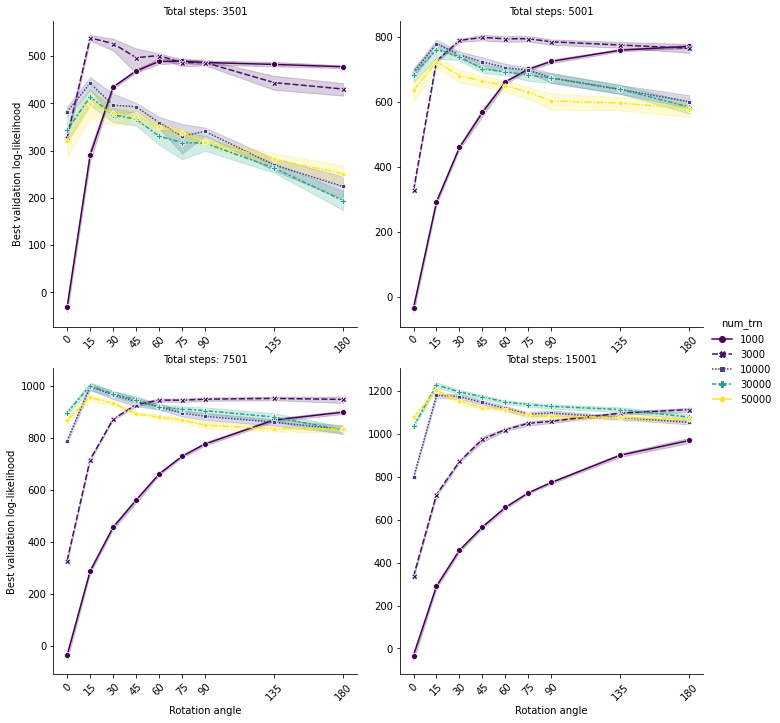

In [15]:
# create a sns lineplot, where the x-axis is the rotation angle, the y-axis is the best validation log-likelihood,
# and the hue is the number of training samples
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps']]
g = sns.relplot(
    x="rotation_angle", y="summary.best_val_ll", hue="num_trn", style="num_trn", col="config.total_steps",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    data=plot_df
)
g.set_axis_labels('Rotation angle', 'Best validation log-likelihood')
g.set_titles('Total steps: {col_name}')
for ax in g.axes:
    ax.set_xticks(plot_df['rotation_angle'].unique())
    ax.set_xticklabels(plot_df['rotation_angle'].unique(), rotation=45)
plt.show()

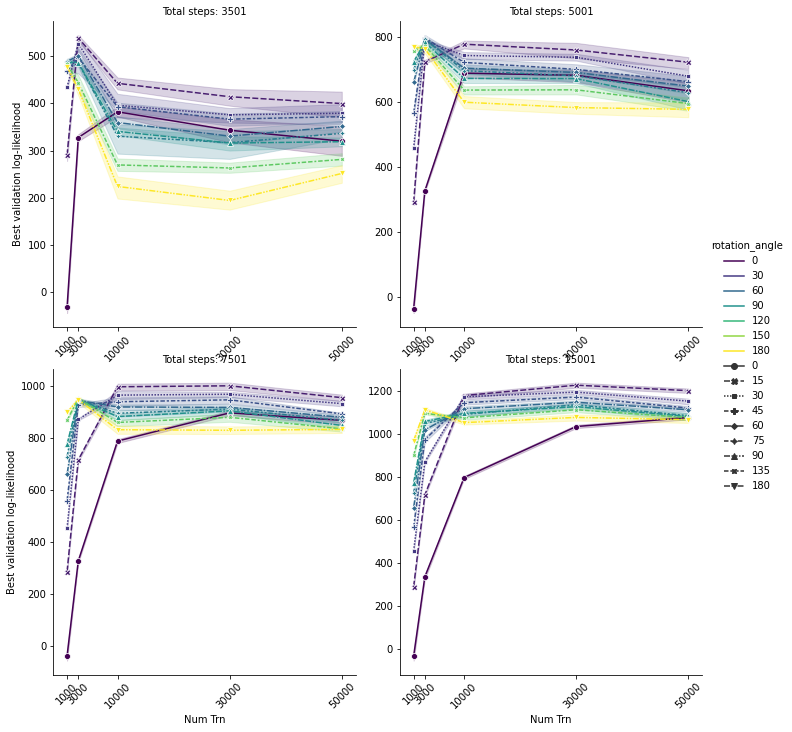

In [18]:
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps']]
g = sns.relplot(
    x="num_trn", y="summary.best_val_ll", hue="rotation_angle", style="rotation_angle", col="config.total_steps",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=2,
    facet_kws=dict(sharey=False, sharex=False),
    data=plot_df
)
g.set_axis_labels('Num Trn', 'Best validation log-likelihood')
g.set_titles('Total steps: {col_name}')
for ax in g.axes:
    ax.set_xticks(plot_df['num_trn'].unique())
    ax.set_xticklabels(plot_df['num_trn'].unique(), rotation=45)
plt.show()

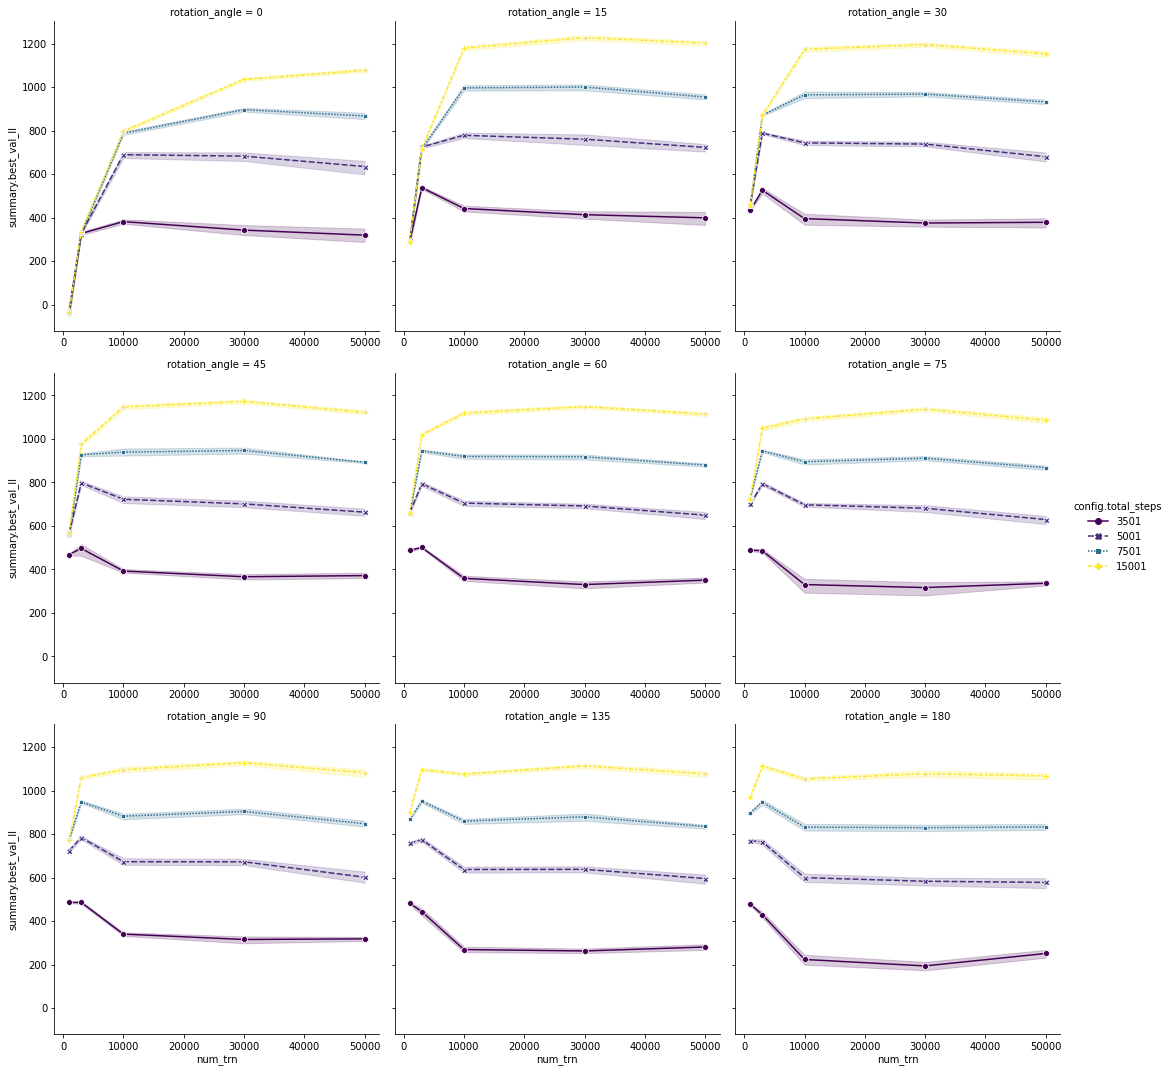

In [20]:
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps']]
g = sns.relplot(
    x="num_trn", y="summary.best_val_ll", hue="config.total_steps", style="config.total_steps", col="rotation_angle",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=3,
    facet_kws=dict(sharey=True, sharex=False),
    data=plot_df
)
plt.show()

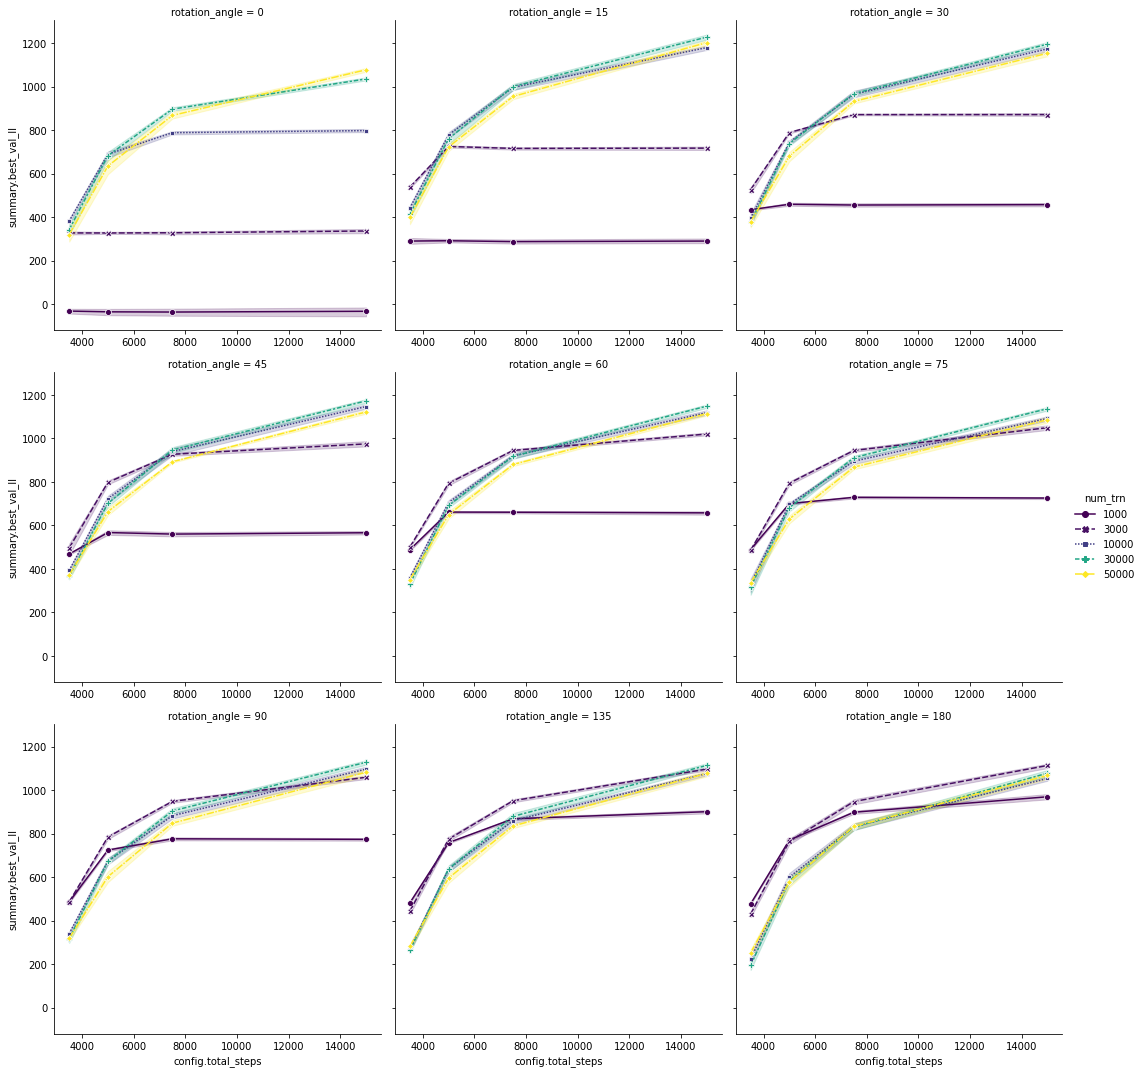

In [21]:
plot_df = df_filtered[['rotation_angle', 'summary.best_val_ll', 'num_trn', 'config.total_steps']]
g = sns.relplot(
    x="config.total_steps", y="summary.best_val_ll", hue="num_trn", style="num_trn", col="rotation_angle",
    markers=True,
    palette=sns.color_palette('viridis', as_cmap=True),
    kind="line",
    col_wrap=3,
    facet_kws=dict(sharey=True, sharex=False),
    data=plot_df
)
plt.show()